In [293]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer ,IterativeImputer
from fancyimpute import KNN, NuclearNormMinimization,SoftImpute , BiScaler,IterativeSVD,MatrixFactorization

In [36]:
cd19_gene =pd.read_csv('./train_data/cd19_gene_expr_train.txt', sep='\t')

as_list = cd19_gene.index.tolist()
#as_list
for i in range(len(as_list)):
    as_list[i] = 'cd19_' + str(as_list[i])
cd19_gene.index = as_list
cd19_gene

,126,175,105,156,143,127,190,211,185,162,...,147,177,220,194,141,229,158,212,117,238
cd19_ENSG00000000419.12,46.880081,30.342231,39.856980,55.056814,44.238240,47.419926,46.020181,-1.239724,29.577598,52.787557,...,28.594372,65.059487,50.206365,20.415242,49.879994,44.629943,37.612509,49.479549,14.052599,45.194342
cd19_ENSG00000000938.12,36.665841,62.103622,43.076633,77.557412,119.289952,14.338827,71.550643,25.139177,116.216802,161.401460,...,40.367935,27.066561,86.965437,57.073290,70.779560,118.893601,120.712305,49.821460,51.508452,68.146717
cd19_ENSG00000001461.16,28.316508,3.032569,22.426250,27.636367,29.700904,6.171200,35.070759,11.291096,18.661417,9.459493,...,42.702194,28.770971,26.442001,47.868345,9.849955,59.091122,2.553387,46.584388,16.144247,20.725060
cd19_ENSG00000001497.16,64.808530,60.957138,45.702074,46.757501,94.128201,52.649208,26.244691,144.297847,83.724466,61.610323,...,72.065120,57.096245,13.793822,32.503754,25.139167,62.681726,113.825572,65.171814,22.956152,38.015449
cd19_ENSG00000001629.9,27.728869,29.253274,14.704561,26.469347,17.878922,22.667564,19.216131,8.961215,16.166679,15.635167,...,48.884863,28.451252,19.064207,18.836441,21.439736,36.045590,105.911223,44.720728,9.445898,52.614699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cd19_ENSG00000281485.1,480.230145,1.232827,39.412163,17.648140,1.232827,1.232827,27.020300,39.412163,1.232827,27.020300,...,27.020300,300.278482,1.232827,1.232827,1.232827,-9.809050,1.232827,459.573081,17.648140,-9.809050
cd19_ENSG00000281649.1,76.287340,49.082795,34.821891,65.395344,42.536098,57.416312,59.690892,50.518813,69.492616,50.994788,...,81.158527,66.693720,87.656764,76.213436,75.045478,86.133135,44.794266,86.703668,31.552422,52.092578
cd19_ENSG00000282031.1,216.457043,131.281896,227.140210,212.725458,243.996422,190.313423,255.826840,244.251133,200.447037,187.527724,...,151.788732,239.440088,267.537558,185.523696,292.511899,137.295838,150.701639,171.623848,103.724487,146.864289
cd19_ENSG00000282122.1,0.127366,457.446041,164.940259,85.858877,158.796293,82.344157,-7.432942,9.187125,10.399257,241.648790,...,-9.809050,-1.628031,85.547196,-0.631863,-1.796180,-1.389386,-1.496406,2.050912,30.658418,-3.480716


In [37]:
cd4_gene =pd.read_csv('./train_data/cd4_gene_expr_train.txt', sep='\t')
as_list = cd4_gene.index.tolist()
#as_list
for i in range(len(as_list)):
    as_list[i] = 'cd4_' + str(as_list[i])
cd4_gene.index = as_list

cd4_gene

,232,212,161,202,169,105,143,194,234,147,...,152,199,141,170,237,205,121,162,158,185
cd4_ENSG00000000419.12,32.899074,55.222269,49.767500,20.244496,30.225665,40.312034,40.617738,41.627701,26.796125,33.322179,...,66.162175,26.526007,33.333009,47.908084,23.528841,14.239737,42.445378,47.551508,41.495339,23.910631
cd4_ENSG00000001461.16,78.626424,66.872878,15.885101,62.629854,107.121388,97.135667,127.121293,121.051043,85.052652,81.381825,...,111.630796,94.960272,94.533731,133.434895,100.661690,58.021348,80.573293,92.897930,104.045297,105.110983
cd4_ENSG00000001497.16,75.687578,65.102424,74.080052,38.496530,66.409847,77.328446,55.931988,59.072852,33.320366,71.215228,...,57.968844,74.767951,57.782157,49.999446,78.742901,25.662390,59.724303,61.219084,60.683574,80.392981
cd4_ENSG00000001629.9,26.117761,35.965436,27.871494,38.197900,35.870817,36.211992,34.982279,32.116188,41.292406,34.042143,...,39.073305,31.281875,42.253947,18.431805,20.529335,9.454839,26.593515,18.735525,32.190062,24.829379
cd4_ENSG00000001631.14,35.541990,52.116183,11.303460,51.839127,26.967176,39.641505,33.269698,87.039565,36.611689,17.227143,...,9.381013,30.444211,26.446103,46.551806,39.901147,19.280343,40.103166,30.351528,18.311755,23.364748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cd4_ENSG00000281350.1,9.975690,11.760343,25.279969,6.707554,20.141551,14.744440,17.818347,33.246021,20.079462,19.146075,...,2.169997,11.318301,33.277281,12.687350,-1.826049,12.783588,23.832706,22.653698,16.531009,32.477974
cd4_ENSG00000281394.1,46.077593,75.665815,-1.826049,2.858594,84.944680,2.858594,97.926887,1.244776,1.244776,26.418793,...,-1.826049,2.858594,114.481512,94.946751,-1.826049,2.858594,-1.826049,27.625255,8.095053,1.244776
cd4_ENSG00000281485.1,3.620248,3.620248,3.620248,12.946118,-1.826049,12.946118,5.841634,5.841634,5.841634,5.841634,...,-1.826049,12.946118,821.786406,5.841634,3.620248,12.946118,360.205434,5.841634,5.841634,5.841634
cd4_ENSG00000281649.1,36.019908,40.390817,54.409160,22.101993,42.149881,62.534544,29.137926,14.734439,40.167358,36.679216,...,19.128025,42.111183,47.942154,56.171263,18.010376,27.367114,23.150931,40.156017,44.595240,36.512787


In [38]:
cd8_gene =pd.read_csv('./train_data/cd8_gene_expr_train.txt', sep='\t')
as_list = cd8_gene.index.tolist()
#as_list
for i in range(len(as_list)):
    as_list[i] = 'cd8_' + str(as_list[i])
cd8_gene.index = as_list

cd8_gene

,126,201,232,138,223,137,108,205,105,236,...,165,157,101,185,143,170,194,190,173,147
cd8_ENSG00000000419.12,55.969744,48.305262,39.131365,50.996508,43.639959,46.060127,46.927262,105.668172,28.444789,40.698588,...,39.827728,80.647209,37.738445,27.490816,14.249180,35.625020,61.714170,73.689412,31.458995,48.645139
cd8_ENSG00000001461.16,18.439721,85.970602,44.300463,82.423150,63.923256,77.502382,41.260888,122.752617,79.766788,56.829045,...,101.802379,88.129954,64.688719,55.996140,14.447701,73.226582,80.416754,61.223712,38.858596,49.675272
cd8_ENSG00000001497.16,14.183961,74.125724,28.277253,46.444543,33.146220,72.790865,43.882559,-5.362341,73.452235,50.389965,...,87.822231,25.378111,4.235013,69.946351,34.911704,33.810245,59.081135,51.748057,-5.010552,52.201729
cd8_ENSG00000001629.9,34.734826,34.242775,22.564823,51.679765,59.375093,18.426756,21.843136,21.270065,15.854488,30.190027,...,33.776492,32.118562,22.511184,29.243585,-0.797948,37.588774,9.889164,5.164473,35.906905,36.613577
cd8_ENSG00000001631.14,19.833871,22.336024,14.266558,51.605295,32.530691,20.684376,28.056159,6.250092,33.417410,32.487289,...,18.926553,79.494349,39.161410,24.319032,34.183379,42.318288,35.226810,32.788105,41.119871,37.337333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cd8_ENSG00000281103.1,18.695950,12.593616,0.526964,12.456941,27.189824,15.238561,21.214492,96.572445,27.697959,26.686386,...,47.916026,35.385366,19.819757,14.250793,-6.190181,42.543183,21.786675,39.812261,42.295275,20.705648
cd8_ENSG00000281350.1,-2.601556,3.193075,-2.601556,19.278227,22.658850,6.795554,14.850210,-1.410569,-1.410569,22.496017,...,31.568793,-4.561450,5.678900,11.672762,-4.561450,27.917617,27.057425,13.882325,38.746020,2.783721
cd8_ENSG00000281394.1,0.170811,1.373548,78.844931,0.170811,0.170811,3.215554,15.111630,3.215554,160.380545,58.736814,...,77.169303,-3.980405,-3.980405,137.003630,-3.980405,-3.980405,-3.980405,73.992626,-3.980405,-3.980405
cd8_ENSG00000281649.1,25.170134,39.141374,37.570134,52.972639,22.217230,33.135242,35.363641,18.718791,35.823809,22.133920,...,34.528683,28.161761,22.130151,38.932648,3.631160,20.955241,31.151504,28.410582,49.288605,32.112075


In [39]:
nasal_gene =pd.read_csv('./train_data/nasal_gene_expr_train.txt', sep='\t')
as_list = nasal_gene.index.tolist()
#as_list
for i in range(len(as_list)):
    as_list[i] = 'nasal_' + str(as_list[i])
nasal_gene.index = as_list

nasal_gene

,126,179,161,201,212,133,177,163,135,136,...,101,162,158,173,147,149,166,190,185,218
nasal_ENSG00000000003.14,-4.837502,181.248557,216.254660,123.024515,83.580433,2.458837,101.776779,71.689233,123.516908,54.654545,...,11.846294,115.788854,198.365793,80.043651,68.932807,53.341079,19.058091,114.206433,53.580185,92.518550
nasal_ENSG00000000419.12,3.092790,58.425299,44.180370,37.223273,39.065227,24.940220,28.995009,48.896426,38.982519,18.155949,...,28.630975,41.021154,47.804729,39.823416,18.918764,27.186588,14.164992,19.630351,21.496576,27.659788
nasal_ENSG00000000938.12,232.999174,-3.397187,4.191857,34.292355,36.956805,111.227925,34.796020,48.592646,53.301131,21.469736,...,270.277310,40.924711,9.631815,130.368778,109.363924,77.693434,236.674427,62.646435,123.344905,22.480534
nasal_ENSG00000000971.15,24.005512,106.025069,90.970802,59.506497,54.976735,17.125512,64.592599,17.019810,80.043463,24.422594,...,6.216938,54.064736,73.600798,39.366737,43.830073,44.243687,11.470766,71.297344,41.513567,64.193993
nasal_ENSG00000001036.13,12.647634,19.757733,17.259098,20.238030,17.558111,28.061365,18.072565,23.363808,15.191073,15.566942,...,2.830105,24.837402,21.250961,16.224861,37.939239,21.848758,10.265538,15.718598,21.468162,28.477310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nasal_ENSG00000281467.1,288.675398,3.862168,32.393118,3.862168,16.559161,3.862168,3.862168,3.862168,54.929692,-3.925289,...,90.161287,7.244831,7.244831,27.372511,34.160350,7.244831,7.244831,7.244831,7.244831,355.804745
nasal_ENSG00000281649.1,13.068108,21.269332,22.165677,9.307777,15.073033,12.287212,6.497527,9.744239,14.087231,22.977145,...,9.212198,17.494910,12.471492,12.843197,9.562189,7.829873,5.300635,12.761537,7.278136,10.546686
nasal_ENSG00000281991.1,15.843160,21.320514,23.939152,15.884305,22.925490,59.116574,18.139867,42.175854,32.291713,41.563622,...,3.587722,25.190081,41.369265,24.661243,41.632314,27.359930,12.497853,23.429224,38.130556,31.218268
nasal_ENSG00000282031.1,59.263237,149.305082,158.822054,169.138773,84.881142,182.011435,144.489316,138.132744,165.656738,73.925719,...,234.386930,112.149763,161.043987,120.984120,78.977117,61.974300,133.808290,144.761265,166.629726,157.389425


In [40]:
nasal_microbiome =pd.read_csv('./train_data/nasal_microbiome_train.txt', sep='\t')
nasal_microbiome

,156,136,169,221,150,152,104,170,163,117,...,153,135,133,121,155,220,185,127,165,217
"g__Actinomyces,s__",0.000000,0.000000,0.000000,0.000000,0.037868,0.038497,0.000000,0.054007,0.008624,0.032337,...,0.000000,0.000000,0.000000,0.030371,0.000000,0.012673,0.000000,0.000000,0.000000,0.032987
"g__Brevibacterium,Other",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009273,0.000000,0.015703,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"g__Corynebacterium,s__durum",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"g__Corynebacterium,s__kroppenstedtii",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009541,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"g__Corynebacterium,s__simulans",0.000000,0.000000,0.000000,0.000000,0.001872,0.000000,0.002854,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"g__Sphingomonas,Unknown",0.000000,0.000000,0.015000,0.000000,0.001872,0.007583,0.000000,0.007568,0.018293,0.000000,...,0.000000,0.000000,0.028958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004807
"g__Staphylococcus,Unknown",0.133087,0.434162,0.048022,0.030253,0.044245,0.017452,0.000000,0.029534,0.008483,0.006610,...,0.037813,0.012626,0.006410,0.006596,0.010290,0.000000,0.000000,0.015084,0.019877,0.009614
"g__Stenotrophomonas,Unknown",0.004186,0.000000,0.012381,0.006368,0.002113,0.003930,0.007689,0.000000,0.011577,0.000000,...,0.000000,0.000000,0.020185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"g__Streptococcus,Unknown",0.140464,0.045990,0.146040,0.111560,0.147144,0.221535,0.115612,0.114744,0.131211,0.280258,...,0.032330,0.202880,0.293084,0.393254,0.199624,0.037066,0.309897,0.014484,0.019028,0.237702


In [41]:
severity_score =pd.read_csv('./train_data/severity_score_train.txt', sep='\t')
severity_score

,severity_score,subject_id
0,4.922664,237
1,1.853421,202
2,6.950658,175
3,8.661423,217
4,8.473521,221
...,...,...
75,3.906028,128
76,3.732077,162
77,5.406015,171
78,0.292955,205


In [42]:
comb_df = pd.DataFrame()
for df in [cd19_gene, cd4_gene, cd8_gene, nasal_gene, nasal_microbiome]:  
    comb_df = comb_df.combine_first( df )
    
comb_df

,101,104,105,108,109,110,115,117,121,126,...,223,227,229,232,233,234,235,236,237,238
cd19_ENSG00000000419.12,38.856455,NaN,39.856980,NaN,NaN,NaN,NaN,14.052599,NaN,46.880081,...,NaN,NaN,44.629943,31.199978,37.255755,40.896954,NaN,18.269733,23.246888,45.194342
cd19_ENSG00000000938.12,55.340934,NaN,43.076633,NaN,NaN,NaN,NaN,51.508452,NaN,36.665841,...,NaN,NaN,118.893601,73.855327,92.411311,67.919039,NaN,72.082627,36.075311,68.146717
cd19_ENSG00000001461.16,26.318800,NaN,22.426250,NaN,NaN,NaN,NaN,16.144247,NaN,28.316508,...,NaN,NaN,59.091122,33.564136,35.216986,25.159886,NaN,21.983788,7.351720,20.725060
cd19_ENSG00000001497.16,53.256922,NaN,45.702074,NaN,NaN,NaN,NaN,22.956152,NaN,64.808530,...,NaN,NaN,62.681726,69.142640,60.244479,47.798086,NaN,46.289715,33.499505,38.015449
cd19_ENSG00000001629.9,24.246088,NaN,14.704561,NaN,NaN,NaN,NaN,9.445898,NaN,27.728869,...,NaN,NaN,36.045590,20.505030,23.098909,23.085076,NaN,47.539140,53.842621,52.614699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nasal_ENSG00000281467.1,90.161287,27.004055,NaN,-4.837502,-4.837502,3.181555,20.556893,29.570313,-3.925289,288.675398,...,NaN,18.005186,NaN,NaN,-2.638925,-2.638925,-4.837502,14.244901,NaN,NaN
nasal_ENSG00000281649.1,9.212198,27.775840,NaN,11.154126,7.138851,23.656230,12.777483,7.362333,3.860517,13.068108,...,NaN,19.771504,NaN,NaN,22.109144,14.249049,11.420940,12.181748,NaN,NaN
nasal_ENSG00000281991.1,3.587722,37.542737,NaN,53.335895,18.516801,36.362000,26.119086,4.691230,36.096657,15.843160,...,NaN,8.341986,NaN,NaN,23.659016,34.509949,10.032910,12.014473,NaN,NaN
nasal_ENSG00000282031.1,234.386930,138.979931,NaN,148.011201,131.387812,142.042926,102.512723,87.003913,171.565349,59.263237,...,NaN,201.128018,NaN,NaN,171.424832,184.786443,148.911838,192.953059,NaN,NaN


In [43]:
# missing subject_id ['215', '134', '219']
comb_df['215'] = np.nan
comb_df['134'] = np.nan
comb_df['219'] = np.nan

In [44]:
comb_df.isnull().sum()

101        0
104    11853
105     6844
108    11986
109    17665
       ...  
237    12819
238    12819
215    24657
134    24657
219    24657
Length: 80, dtype: int64

In [45]:
comb_df = comb_df.transpose()

In [46]:
comb_df.isnull().sum()

cd19_ENSG00000000419.12    40
cd19_ENSG00000000938.12    40
cd19_ENSG00000001461.16    40
cd19_ENSG00000001497.16    40
cd19_ENSG00000001629.9     40
                           ..
nasal_ENSG00000281467.1    16
nasal_ENSG00000281649.1    16
nasal_ENSG00000281991.1    16
nasal_ENSG00000282031.1    16
nasal_ENSG00000282432.1    16
Length: 24657, dtype: int64

In [47]:
# # Missing values Ratio
# comb_df= comb_df[comb_df.columns[comb_df.isnull().mean() <0.3]]
# comb_df

In [48]:
comb_df.isnull().sum()

cd19_ENSG00000000419.12    40
cd19_ENSG00000000938.12    40
cd19_ENSG00000001461.16    40
cd19_ENSG00000001497.16    40
cd19_ENSG00000001629.9     40
                           ..
nasal_ENSG00000281467.1    16
nasal_ENSG00000281649.1    16
nasal_ENSG00000281991.1    16
nasal_ENSG00000282031.1    16
nasal_ENSG00000282432.1    16
Length: 24657, dtype: int64

In [49]:
# # Low variance filter
# from sklearn.feature_selection import VarianceThreshold
# threshold_n=0.95
# sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
# sel_var=sel.fit_transform(comb_df)
# comb_df = comb_df[comb_df.columns[sel.get_support(indices=True)]] 
# comb_df

In [50]:
# High Correlation Filter
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [51]:
# comb_df = trimm_correlated(comb_df, 0.95)

In [52]:
# comb_df

In [53]:
# comb_df.index

In [54]:
# severity_score['subject_id']

In [55]:
comb_df.reset_index(inplace=True)
comb_df

,index,cd19_ENSG00000000419.12,cd19_ENSG00000000938.12,cd19_ENSG00000001461.16,cd19_ENSG00000001497.16,cd19_ENSG00000001629.9,cd19_ENSG00000001631.14,cd19_ENSG00000002549.12,cd19_ENSG00000002822.15,cd19_ENSG00000002919.14,...,nasal_ENSG00000280637.1,nasal_ENSG00000280755.1,nasal_ENSG00000280778.1,nasal_ENSG00000280832.1,nasal_ENSG00000281383.1,nasal_ENSG00000281467.1,nasal_ENSG00000281649.1,nasal_ENSG00000281991.1,nasal_ENSG00000282031.1,nasal_ENSG00000282432.1
0,101,38.856455,55.340934,26.31880,53.256922,24.246088,27.531098,80.423126,10.012680,19.416264,...,5.194278,26.507794,-2.321184,54.369508,-1.006372,90.161287,9.212198,3.587722,234.386930,9.734210
1,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.414184,20.057942,4.008020,16.364680,5.115424,27.004055,27.775840,37.542737,138.979931,-4.837502
2,105,39.856980,43.076633,22.42625,45.702074,14.704561,21.596467,125.331892,18.514680,16.264019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.414184,18.310673,9.402626,1.588023,9.934617,-4.837502,11.154126,53.335895,148.011201,-4.837502
4,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.414184,76.097896,4.904198,26.010095,-2.479376,-4.837502,7.138851,18.516801,131.387812,-4.837502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,237,23.246888,36.075311,7.35172,33.499505,53.842621,59.982620,45.580721,94.345319,16.189853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,238,45.194342,68.146717,20.72506,38.015449,52.614699,14.847110,99.249788,-2.935020,16.108770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
comb_df = comb_df.rename(columns={'index':'subject_id'})
comb_df

,subject_id,cd19_ENSG00000000419.12,cd19_ENSG00000000938.12,cd19_ENSG00000001461.16,cd19_ENSG00000001497.16,cd19_ENSG00000001629.9,cd19_ENSG00000001631.14,cd19_ENSG00000002549.12,cd19_ENSG00000002822.15,cd19_ENSG00000002919.14,...,nasal_ENSG00000280637.1,nasal_ENSG00000280755.1,nasal_ENSG00000280778.1,nasal_ENSG00000280832.1,nasal_ENSG00000281383.1,nasal_ENSG00000281467.1,nasal_ENSG00000281649.1,nasal_ENSG00000281991.1,nasal_ENSG00000282031.1,nasal_ENSG00000282432.1
0,101,38.856455,55.340934,26.31880,53.256922,24.246088,27.531098,80.423126,10.012680,19.416264,...,5.194278,26.507794,-2.321184,54.369508,-1.006372,90.161287,9.212198,3.587722,234.386930,9.734210
1,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.414184,20.057942,4.008020,16.364680,5.115424,27.004055,27.775840,37.542737,138.979931,-4.837502
2,105,39.856980,43.076633,22.42625,45.702074,14.704561,21.596467,125.331892,18.514680,16.264019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.414184,18.310673,9.402626,1.588023,9.934617,-4.837502,11.154126,53.335895,148.011201,-4.837502
4,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.414184,76.097896,4.904198,26.010095,-2.479376,-4.837502,7.138851,18.516801,131.387812,-4.837502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,237,23.246888,36.075311,7.35172,33.499505,53.842621,59.982620,45.580721,94.345319,16.189853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,238,45.194342,68.146717,20.72506,38.015449,52.614699,14.847110,99.249788,-2.935020,16.108770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
severity_score.dtypes

severity_score    float64
subject_id          int64
dtype: object

In [58]:
comb_df.dtypes

subject_id                  object
cd19_ENSG00000000419.12    float64
cd19_ENSG00000000938.12    float64
cd19_ENSG00000001461.16    float64
cd19_ENSG00000001497.16    float64
                            ...   
nasal_ENSG00000281467.1    float64
nasal_ENSG00000281649.1    float64
nasal_ENSG00000281991.1    float64
nasal_ENSG00000282031.1    float64
nasal_ENSG00000282432.1    float64
Length: 24658, dtype: object

In [59]:
comb_df.subject_id = comb_df.subject_id.astype('int64')

In [60]:
comb_df = pd.merge(comb_df, severity_score, on='subject_id')


In [61]:
comb_df = comb_df.set_index('subject_id')

In [62]:
comb_df

,cd19_ENSG00000000419.12,cd19_ENSG00000000938.12,cd19_ENSG00000001461.16,cd19_ENSG00000001497.16,cd19_ENSG00000001629.9,cd19_ENSG00000001631.14,cd19_ENSG00000002549.12,cd19_ENSG00000002822.15,cd19_ENSG00000002919.14,cd19_ENSG00000003056.7,...,nasal_ENSG00000280755.1,nasal_ENSG00000280778.1,nasal_ENSG00000280832.1,nasal_ENSG00000281383.1,nasal_ENSG00000281467.1,nasal_ENSG00000281649.1,nasal_ENSG00000281991.1,nasal_ENSG00000282031.1,nasal_ENSG00000282432.1,severity_score
subject_id,,,,,,,,,,,,,,,,,,,,,
101,38.856455,55.340934,26.31880,53.256922,24.246088,27.531098,80.423126,10.012680,19.416264,449.331940,...,26.507794,-2.321184,54.369508,-1.006372,90.161287,9.212198,3.587722,234.386930,9.734210,7.617048
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.057942,4.008020,16.364680,5.115424,27.004055,27.775840,37.542737,138.979931,-4.837502,4.983152
105,39.856980,43.076633,22.42625,45.702074,14.704561,21.596467,125.331892,18.514680,16.264019,243.135221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.298928
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.310673,9.402626,1.588023,9.934617,-4.837502,11.154126,53.335895,148.011201,-4.837502,6.806016
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.097896,4.904198,26.010095,-2.479376,-4.837502,7.138851,18.516801,131.387812,-4.837502,5.766088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,23.246888,36.075311,7.35172,33.499505,53.842621,59.982620,45.580721,94.345319,16.189853,140.140171,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.922664
238,45.194342,68.146717,20.72506,38.015449,52.614699,14.847110,99.249788,-2.935020,16.108770,302.436996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.989781
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.134994


In [ ]:


# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# X_test = sc.transform(X_test)

In [313]:
regr = RandomForestRegressor(max_depth=100, random_state=24)
# X_train=pd.get_dummies(X_train)
# comb_df.fillna((comb_df.mean()), inplace=True)
X=comb_df.loc[:, comb_df.columns != 'severity_score']
y =comb_df['severity_score']

imp = SoftImpute()
X = imp.fit_transform(X)



C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\uyent\urhackathon\lib\site-packages\fancyimpute\solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


[SoftImpute] Max Singular Value of X_init = 223722.145107
[SoftImpute] Iter 1: observed MAE=10.088737 rank=58
[SoftImpute] Iter 2: observed MAE=10.088737 rank=58
[SoftImpute] Iter 3: observed MAE=10.088737 rank=58
[SoftImpute] Iter 4: observed MAE=10.088737 rank=58
[SoftImpute] Iter 5: observed MAE=10.088737 rank=58
[SoftImpute] Iter 6: observed MAE=10.088737 rank=58
[SoftImpute] Iter 7: observed MAE=10.088737 rank=58
[SoftImpute] Iter 8: observed MAE=10.088737 rank=58
[SoftImpute] Iter 9: observed MAE=10.088737 rank=58
[SoftImpute] Iter 10: observed MAE=10.088737 rank=58
[SoftImpute] Iter 11: observed MAE=10.088737 rank=58
[SoftImpute] Iter 12: observed MAE=10.088737 rank=58
[SoftImpute] Iter 13: observed MAE=10.088737 rank=58
[SoftImpute] Iter 14: observed MAE=10.088737 rank=58
[SoftImpute] Iter 15: observed MAE=10.088737 rank=58
[SoftImpute] Iter 16: observed MAE=10.088737 rank=58
[SoftImpute] Iter 17: observed MAE=10.088737 rank=58
[SoftImpute] Iter 18: observed MAE=10.088737 rank=

C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


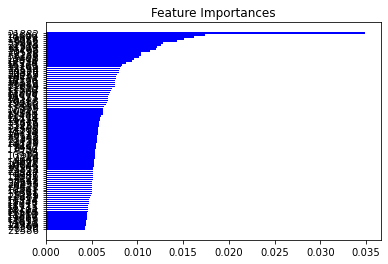

In [316]:
regr.fit(X, y)
features = pd.DataFrame(X).columns
importances=regr.feature_importances_
indices = np.argsort(importances)[-100:]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

In [317]:
X =pd.DataFrame(X).filter([features[i] for i in indices])

C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [318]:
X

C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,21586,8296,24309,13920,14611,8539,19063,17854,11210,23666,...,20592,21796,18209,21314,22995,9252,8086,19379,18609,21882
0,49.370566,77.909614,353.344435,20.478026,619.964849,43.289801,36.508259,0.419043,57.364012,4.830308,...,4.512304,-4.837502,120.939591,78.971927,-0.814316,109.063616,126.553729,26.579645,12.187010,92.295559
1,15.266717,153.212280,22.315085,25.383001,679.638870,22.746861,23.944650,12.394494,6.261485,41.909345,...,72.002929,961.203417,55.257703,81.383690,24.465922,79.723691,45.508826,18.614232,71.063322,34.693002
2,35.989737,158.592100,23.195402,15.521701,707.378363,36.388312,20.616636,10.187089,8.145391,136.455640,...,78.148916,648.224660,57.866947,84.353908,14.404627,74.151755,87.478960,21.534869,52.520269,23.907595
3,43.552661,164.004453,-2.754168,17.508256,807.075576,39.315517,7.924781,8.163114,11.075289,41.909345,...,137.598551,511.599130,43.763594,85.344476,25.748786,71.258475,86.543388,26.611989,68.780227,30.744176
4,86.778269,164.004453,-0.890430,25.383001,679.638870,39.315517,17.972977,1.680971,11.075289,41.909345,...,-4.837502,148.035865,112.732420,112.984721,3.705203,71.258475,86.543388,20.826106,55.720834,32.426728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,35.989737,139.661204,23.195402,25.383001,679.638870,27.151174,20.616636,10.187089,9.432260,136.455640,...,78.148916,648.224660,57.866947,84.353908,14.404627,89.032525,72.446925,21.534869,52.520269,23.907595
76,35.989737,126.872430,23.195402,25.383001,679.638870,70.785437,20.616636,10.187089,14.759630,136.455640,...,78.148916,648.224660,57.866947,84.353908,14.404627,112.420207,135.588386,21.534869,52.520269,23.907595
77,35.989737,164.004453,23.195402,25.383001,679.638870,39.315517,20.616636,10.187089,11.075289,136.455640,...,78.148916,648.224660,57.866947,84.353908,14.404627,71.258475,86.543388,21.534869,52.520269,23.907595
78,35.989737,164.004453,23.195402,25.383001,679.638870,39.315517,20.616636,10.187089,11.075289,136.455640,...,78.148916,648.224660,57.866947,84.353908,14.404627,71.258475,86.543388,21.534869,52.520269,23.907595


In [244]:
# from sklearn.feature_selection import SelectFromModel

# ft = SelectFromModel(regr)

# X = ft.fit_transform(X,y)
# X.shape

In [70]:
# y.shape

# Deal with test data

In [29]:
cd19_gene_test = pd.read_csv('./test_data/cd19_gene_expr_test.txt', sep='\t')
cd4_gene_test = pd.read_csv('./test_data/cd4_gene_expr_test.txt', sep='\t')
cd8_gene_test = pd.read_csv('./test_data/cd8_gene_expr_test.txt', sep='\t')
nasal_gene_test = pd.read_csv('./test_data/nasal_gene_expr_test.txt', sep='\t')
nasal_microbiome_test = pd.read_csv('./test_data/nasal_microbiome_test.txt', sep='\t')

In [30]:
as_list = cd19_gene_test.index.tolist()
#as_list
for i in range(len(as_list)):
    as_list[i] = 'cd19_' + str(as_list[i])
cd19_gene_test.index = as_list
cd19_gene_test

,125,122,204,116,107,114,183,106,144,174,...,118,188,208,225,159,119,213,198,112,132
cd19_ENSG00000000419.12,53.437092,17.781735,52.728226,52.318044,31.437159,47.170708,29.456746,40.394254,35.410362,38.799699,...,71.868743,41.586736,47.704125,43.768071,42.026704,40.132577,36.931689,24.391773,34.136458,27.309778
cd19_ENSG00000000938.12,137.891404,133.087880,40.263789,26.158723,-4.490010,43.782420,86.833642,32.490260,15.296124,20.069379,...,56.743905,120.918009,66.142850,101.315403,67.643251,69.045344,93.414917,7.267067,137.639956,84.002003
cd19_ENSG00000001461.16,27.087686,38.894054,38.748221,28.108955,89.589808,33.924054,25.521873,29.264499,32.339259,23.939153,...,20.974944,41.424225,27.355441,56.041266,26.278514,29.847691,23.989107,-9.809050,31.486372,11.641511
cd19_ENSG00000001497.16,52.197849,86.440494,63.144793,38.569149,74.389045,65.150924,31.898736,50.019824,66.252685,99.466689,...,39.960369,46.814112,42.828870,54.191632,53.047804,40.813609,88.052023,26.628606,53.144661,16.266150
cd19_ENSG00000001629.9,19.127863,40.357850,21.240071,23.830664,26.292149,39.690884,40.279018,27.994213,34.798466,38.748257,...,38.156127,23.882081,30.335590,17.524707,24.827421,21.413288,17.993761,43.399178,27.325968,16.675963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cd19_ENSG00000281485.1,-9.809050,-9.809050,1.232827,1.232827,1.232827,27.020300,1.232827,382.695825,1.232827,1.232827,...,39.412163,1.232827,-9.809050,-9.809050,1.232827,1.232827,213.112424,1.232827,1.232827,27.020300
cd19_ENSG00000281649.1,66.701865,58.387221,73.931782,71.877356,37.119990,61.712527,48.436629,87.017077,110.951944,13.953811,...,104.664790,96.435249,65.525615,64.306939,56.502771,77.289762,94.863163,59.838306,48.027526,83.659227
cd19_ENSG00000282031.1,210.791079,172.515477,240.037471,137.614360,176.213432,253.729025,196.760061,216.656921,213.613216,111.279216,...,104.990316,181.923047,196.475566,198.008569,196.605045,239.117584,192.494791,28.511715,222.714626,173.441908
cd19_ENSG00000282122.1,178.624406,-3.480716,155.042562,184.881224,-1.796180,15.334281,57.341786,-1.796180,0.774806,9.021247,...,9.187125,-1.245895,272.010902,-1.660120,-1.796180,0.529074,-1.796180,6.013936,2.946342,56.477214


In [31]:
as_list = cd4_gene_test.index.tolist()
#as_list
for i in range(len(as_list)):
    as_list[i] = 'cd4_' + str(as_list[i])
cd4_gene_test.index = as_list
cd4_gene_test

,186,151,213,112,132,226,180,174,225,116,...,114,182,159,208,122,192,123,200,228,106
cd4_ENSG00000000419.12,48.005976,29.575554,48.607998,37.507329,38.633911,51.551657,51.563985,28.743452,53.975637,45.649304,...,39.099685,55.647324,29.810271,34.386239,31.101853,31.819258,26.053874,31.720355,34.270975,45.454571
cd4_ENSG00000001461.16,77.545930,94.060829,103.346902,121.974698,75.191618,72.695246,110.629392,47.516888,103.955504,93.203433,...,62.980736,107.540563,113.287275,98.974742,99.932973,113.620838,98.041666,100.630622,75.820626,65.059095
cd4_ENSG00000001497.16,44.529202,67.624158,78.392334,50.871958,35.432149,53.980501,68.168226,40.812407,63.300304,74.597036,...,26.682764,60.826737,60.206379,49.058047,61.648820,79.060454,63.265811,78.562528,49.258040,54.613035
cd4_ENSG00000001629.9,28.664040,21.796487,16.367629,43.699980,26.342369,21.980485,25.163772,23.134053,22.972630,34.299659,...,20.522346,33.487916,29.293951,18.810708,24.052926,41.533890,28.766014,29.751022,33.894263,21.738663
cd4_ENSG00000001631.14,41.388736,18.975060,19.321721,28.167740,41.041358,34.268329,60.125693,75.100309,48.412254,32.837732,...,58.044339,34.958297,31.370310,26.925322,21.261420,49.163078,28.235756,29.886952,31.607087,51.853362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cd4_ENSG00000281350.1,10.479357,2.169997,19.032980,8.280689,15.685605,17.074225,15.783948,5.831509,12.332143,13.386556,...,11.797778,30.137698,27.815076,28.945473,14.213263,9.417621,15.150991,15.340319,18.091251,15.021082
cd4_ENSG00000281394.1,2.858594,85.187504,1.874154,1.244776,1.486431,-1.826049,1.244776,1.244776,-1.826049,1.244776,...,1.244776,47.287528,43.962163,64.686753,-1.826049,2.858594,2.858594,35.037777,1.244776,1.244776
cd4_ENSG00000281485.1,12.946118,-1.826049,5.841634,5.841634,5.841634,-1.826049,5.841634,5.841634,3.620248,5.841634,...,5.841634,12.946118,5.841634,3.620248,3.620248,12.946118,12.946118,12.946118,5.841634,5.841634
cd4_ENSG00000281649.1,30.453746,33.464990,42.601089,37.315662,54.592362,30.860489,35.205582,29.396924,50.143863,40.011300,...,27.738637,31.858812,33.789621,26.101031,45.439043,26.534659,41.977201,36.778280,35.637698,31.239573


In [32]:
as_list = cd8_gene_test.index.tolist()
#as_list
for i in range(len(as_list)):
    as_list[i] = 'cd8_' + str(as_list[i])
cd8_gene_test.index = as_list
cd8_gene_test

,184,178,122,208,181,195,125,222,142,200,...,106,174,168,183,160,180,191,112,114,132
cd8_ENSG00000000419.12,47.146274,74.633381,73.375110,21.184662,6.576716,43.790288,52.904079,87.465275,32.792370,36.357500,...,53.789882,35.024588,90.477201,32.844378,74.551494,22.571508,42.352363,56.695000,50.918157,40.593866
cd8_ENSG00000001461.16,80.235900,65.101369,67.469673,33.655001,65.094238,63.488682,70.165921,76.120798,45.337937,70.728337,...,77.406741,91.361248,61.201110,58.377570,37.500395,33.122687,82.134227,9.797291,67.898541,75.696727
cd8_ENSG00000001497.16,29.709144,54.345760,36.295782,69.662057,67.255835,42.432436,61.057761,24.640273,64.748130,63.918752,...,59.953354,91.947804,17.519076,91.916376,23.136555,23.705217,48.735405,60.971252,51.125597,53.339423
cd8_ENSG00000001629.9,44.012262,23.036595,14.909740,31.133423,0.706765,17.549993,17.966585,80.628062,29.383776,31.995016,...,19.614457,23.911670,20.891145,15.077993,41.711987,29.119787,20.254648,10.044287,19.627452,41.005041
cd8_ENSG00000001631.14,46.375204,17.181276,26.167564,44.690790,65.780368,21.826557,18.305712,90.853743,22.436499,31.019646,...,35.105985,4.055331,20.240611,43.043772,62.583186,39.971432,33.079203,5.224638,24.752887,17.125471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cd8_ENSG00000281103.1,19.284599,2.507371,39.113563,29.928600,44.416956,51.661405,29.539550,9.606585,22.921077,25.090095,...,34.996472,11.183157,32.331317,32.686145,26.300012,16.342945,46.004833,-6.190181,12.119260,15.207768
cd8_ENSG00000281350.1,8.244724,-2.601556,21.636428,20.257683,31.992387,17.879604,19.289710,-1.410569,12.831079,30.175380,...,8.015759,-0.230799,8.643929,11.148787,10.854597,27.778163,8.103989,-1.071191,12.486697,10.247660
cd8_ENSG00000281394.1,0.170811,0.170811,0.170811,0.170811,94.830096,0.170811,0.170811,3.215554,37.038393,16.977021,...,-3.980405,-3.980405,-3.980405,35.540007,-3.980405,-3.980405,-3.980405,35.468856,37.990867,-3.980405
cd8_ENSG00000281649.1,26.114558,73.996933,30.287250,28.463326,32.832866,36.072127,35.235563,63.857619,22.559793,24.193618,...,29.077311,38.022482,18.137221,41.987460,26.093640,29.800174,31.376840,41.471833,39.685755,34.007328


In [33]:
as_list = nasal_gene_test.index.tolist()
#as_list
for i in range(len(as_list)):
    as_list[i] = 'nasal_' + str(as_list[i])
nasal_gene_test.index = as_list
nasal_gene_test

,187,122,184,207,120,124,208,195,224,176,...,154,228,168,159,213,230,114,144,132,204
nasal_ENSG00000000003.14,177.836153,167.099980,123.331924,-4.837502,86.842530,104.795574,143.613250,91.539567,109.207206,82.036246,...,198.882531,130.536570,10.848618,147.120938,195.899640,47.722961,77.394751,45.330943,121.305544,85.417435
nasal_ENSG00000000419.12,34.559780,69.539607,28.399313,13.129646,47.960214,56.473512,78.691010,30.468860,32.453350,29.858463,...,46.966471,45.443171,23.575121,36.215527,57.081231,37.601118,34.658748,18.163520,3.380534,55.960785
nasal_ENSG00000000938.12,63.085533,-3.596755,19.369928,255.816280,67.581047,-4.837502,40.042122,123.802533,45.990829,99.666756,...,24.300193,20.915287,98.802659,19.783035,15.514572,109.711383,52.030548,220.391252,2.857515,14.802918
nasal_ENSG00000000971.15,72.183399,82.846112,51.116850,11.729904,51.873252,44.474680,53.309352,23.394333,46.831045,68.630043,...,72.439085,84.285970,34.094043,65.847821,105.271701,25.538002,34.744977,34.935176,129.354377,61.548036
nasal_ENSG00000001036.13,11.783072,15.892261,15.381867,0.482156,28.466488,23.229280,34.287304,20.712307,13.787384,14.957775,...,21.734803,30.509700,14.932248,19.336290,19.990093,7.366033,21.754999,17.867264,6.726899,29.693606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nasal_ENSG00000281467.1,50.035337,3.862168,3.862168,197.203553,3.862168,3.862168,3.862168,3.862168,-3.925289,83.727093,...,-2.638925,-2.638925,57.050943,-2.638925,-2.638925,93.956008,7.244831,7.244831,7.244831,7.244831
nasal_ENSG00000281649.1,20.137423,19.816063,7.768260,6.277256,11.302767,17.884893,19.977270,6.846492,13.273712,6.301603,...,12.898361,21.838877,13.403440,15.791171,26.649664,7.910618,14.564875,16.531436,14.902320,17.943409
nasal_ENSG00000281991.1,30.078565,23.703459,26.666830,7.150152,43.016528,32.201262,61.445145,40.752050,33.745088,14.453144,...,25.476714,12.156588,22.510383,28.269375,27.887704,18.855206,69.146379,26.659052,18.047968,43.537799
nasal_ENSG00000282031.1,178.783272,171.744430,114.870089,123.178365,152.586200,189.061084,123.456439,104.822366,147.835685,128.989568,...,183.845240,223.756464,71.840841,149.639517,257.798499,156.431870,92.555121,153.594551,169.450979,116.453406


In [34]:
comb_df_test = pd.DataFrame()
for df in [cd19_gene_test, cd4_gene_test, cd8_gene_test, nasal_gene_test, nasal_microbiome_test]:  
    comb_df_test = comb_df_test.combine_first( df )
    
comb_df_test

,102,103,106,107,111,112,114,116,118,119,...,208,213,222,224,225,226,228,230,231,239
cd19_ENSG00000000419.12,NaN,NaN,40.394254,31.437159,NaN,34.136458,47.170708,52.318044,71.868743,40.132577,...,47.704125,36.931689,NaN,NaN,43.768071,NaN,30.751730,70.784714,NaN,NaN
cd19_ENSG00000000938.12,NaN,NaN,32.490260,-4.490010,NaN,137.639956,43.782420,26.158723,56.743905,69.045344,...,66.142850,93.414917,NaN,NaN,101.315403,NaN,63.014816,98.455032,NaN,NaN
cd19_ENSG00000001461.16,NaN,NaN,29.264499,89.589808,NaN,31.486372,33.924054,28.108955,20.974944,29.847691,...,27.355441,23.989107,NaN,NaN,56.041266,NaN,46.187474,38.500762,NaN,NaN
cd19_ENSG00000001497.16,NaN,NaN,50.019824,74.389045,NaN,53.144661,65.150924,38.569149,39.960369,40.813609,...,42.828870,88.052023,NaN,NaN,54.191632,NaN,42.355809,10.151936,NaN,NaN
cd19_ENSG00000001629.9,NaN,NaN,27.994213,26.292149,NaN,27.325968,39.690884,23.830664,38.156127,21.413288,...,30.335590,17.993761,NaN,NaN,17.524707,NaN,29.935961,1.297156,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nasal_ENSG00000281467.1,-3.925289,-2.638925,-2.638925,-2.638925,10.474551,NaN,7.244831,-2.638925,48.937389,-2.638925,...,3.862168,-2.638925,NaN,-3.925289,NaN,-0.150998,-2.638925,93.956008,9.233861,NaN
nasal_ENSG00000281649.1,16.398318,14.382949,-4.017095,3.704461,21.064906,NaN,14.564875,25.632492,8.447303,16.105466,...,19.977270,26.649664,NaN,13.273712,NaN,15.265794,21.838877,7.910618,6.962074,NaN
nasal_ENSG00000281991.1,38.526833,15.590822,-4.837502,29.666913,36.438562,NaN,69.146379,30.986131,29.173484,31.109377,...,61.445145,27.887704,NaN,33.745088,NaN,38.088675,12.156588,18.855206,31.616706,NaN
nasal_ENSG00000282031.1,198.249318,207.078942,167.434330,40.805819,168.361815,NaN,92.555121,191.811364,71.460501,168.689267,...,123.456439,257.798499,NaN,147.835685,NaN,242.206270,223.756464,156.431870,185.903734,NaN


In [35]:
comb_df_test['167'] = np.nan
comb_df_test['113'] = np.nan
comb_df_test.shape

(24657, 59)

In [36]:
comb_df_test= comb_df_test.transpose()

In [37]:
comb_df_test.shape

(59, 24657)

In [38]:
# # Missing values Ratio
# comb_df_test = comb_df_test[comb_df_test.columns[comb_df_test.isnull().mean() <0.3]]
# comb_df_test.shape

(59, 6992)

In [39]:
# # Low variance filter
# from sklearn.feature_selection import VarianceThreshold
# threshold_n=0.95
# sel_test = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
# sel_var_test = sel_test.fit_transform(comb_df_test)
# comb_df_test = comb_df_test[comb_df_test.columns[sel.get_support(indices=True)]] 
# comb_df_test.shape

(59, 6844)

In [40]:
# comb_df_test = trimm_correlated(comb_df_test, 0.96)
# comb_df_test.shape

(59, 6764)

In [41]:
# comb_df_test= comb_df_test.iloc[:,0:6760]
# comb_df_test.shape

(59, 6760)

In [42]:
comb_df.shape

(80, 6761)

# Prediction

In [43]:
X_train = comb_df.loc[:, comb_df.columns != 'severity_score']
y_train = comb_df['severity_score']
X_test = comb_df_test

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imp_mean.fit_transform(X_train)
X_test = imp_mean.transform(X_test)
# X_test = sc.transform(X_test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.61059432e-01, 8.24469832e-02, 7.11796215e-02, 4.65237966e-02,
       4.17030113e-02, 2.97884161e-02, 2.78228919e-02, 2.52986559e-02,
       2.16895778e-02, 1.96711249e-02, 1.77953629e-02, 1.74380135e-02,
       1.60188824e-02, 1.58075766e-02, 1.41779093e-02, 1.30570657e-02,
       1.28000323e-02, 1.19462401e-02, 1.08008751e-02, 1.02888620e-02,
       9.69259809e-03, 9.44253604e-03, 8.69374685e-03, 8.53534744e-03,
       8.24589451e-03, 7.95528326e-03, 7.70607767e-03, 7.37321529e-03,
       7.21358384e-03, 6.97862575e-03, 6.91433386e-03, 6.67893485e-03,
       6.43045292e-03, 6.17806773e-03, 6.08469706e-03, 6.05849637e-03,
       5.83176759e-03, 5.54793244e-03, 5.46223015e-03, 5.44941008e-03,
       5.19171306e-03, 5.15601547e-03, 4.92805752e-03, 4.82568343e-03,
       4.77304032e-03, 4.64369489e-03, 4.62119004e-03, 4.40930593e-03,
       4.28512007e-03, 4.01323034e-03, 3.96795683e-03, 3.92893054e-03,
       3.83473391e-03, 3.73602171e-03, 3.69718094e-03, 3.44313714e-03,
      

In [253]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regr.predict(X_test)
y_pred

array([4.82168123])

# Experiment PCA to Random Forest

In [30]:
# a = imp_mean.fit_transform(X)
# pd.DataFrame(a)

In [301]:
X.shape

C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(80, 200)

In [302]:
pd.DataFrame(X).isnull().sum()

C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8296     0
11571    0
9704     0
24536    0
22787    0
        ..
9252     0
21796    0
19379    0
8086     0
21882    0
Length: 200, dtype: int64

In [319]:
X =X.values
y= np.array(y)

C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [320]:
loo = LeaveOneOut()
loo.get_n_splits(X)

C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


80

In [329]:
sc = StandardScaler()
pca = PCA(n_components=4)


C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [332]:

mse = []
for train_index, test_index in loo.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    rf =RandomForestRegressor(max_depth=100, random_state=24)

    rf.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = rf.predict(X_test)
    # errors = abs(y_pred - test_labels)
    mse.append(mean_squared_error(y_test, y_pred))
np.mean(mse)

C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3.282041781814782

In [110]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

In [202]:
# from sklearn.decomposition import FactorAnalysis
# FA = FactorAnalysis()
# X_train = FA.fit_transform(X_train)
# X_test = FA.transform(X_test)

In [203]:
# import umap

# umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=60)
# X_train = umap_data.fit_transform(X_train)
# X_test = umap_data.transform(X_test)

In [204]:
# from scipy import sparse
# transformer = IncrementalPCA(n_components=10, batch_size=20)
# X_sparse = sparse.csr_matrix(X_train)
# X_train = transformer.fit_transform(X_sparse)
# X_test = transformer.transform(X_test)

In [195]:

# pca = PCA(n_components=5)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [333]:
mse

C:\Users\uyent\urhackathon\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.006580529030611196,
 3.1145960780302078,
 2.9337175137446283,
 2.4102622530037334,
 0.032694284819674915,
 1.4480091440628917,
 0.6618782952945358,
 4.894256069387842,
 2.7985384740798387,
 0.0037159143388897048,
 7.102445130705678,
 1.252843392005722,
 4.5530464065843805,
 1.0293603000186025,
 0.02077781975197509,
 4.4208347927543095,
 0.6350293210880554,
 0.7800247439061023,
 5.214742670724961,
 0.006880922536508661,
 5.147935117507815,
 0.7420759791644255,
 0.9650639217602851,
 0.019239001344984862,
 20.447973207113925,
 0.11212155096511851,
 0.1950319384418821,
 9.50830983457648,
 0.03463809715839701,
 1.2142251868794238,
 0.4202062081158158,
 2.260309342193552,
 1.0129706153064113,
 0.284718757659391,
 7.938783710729173,
 0.6550478757360731,
 6.770806028845285,
 0.6805618724638232,
 0.35947610494022697,
 3.815817062898814,
 0.7405888917318169,
 2.0289517108508126,
 0.0038151017575802095,
 2.067621472611042,
 8.919577368325813,
 0.6870610082533877,
 0.9724375948674733,
 0.043624

In [197]:
# from sklearn.linear_model import Lasso
# lasso = Lasso( normalize = True)
# lassocv = LassoCV(alphas = None, cv = 10, normalize = True)
# lassocv.fit(X_train, y_train)

# lasso.set_params(alpha=lassocv.alpha_)
# lasso.fit(X_train, y_train)
# mean_squared_error(y_test, lasso.predict(X_test))

In [291]:


regr = RandomForestRegressor()

regr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regr.predict(X_test)
# errors = abs(y_pred - test_labels)
mean_squared_error(y_test, y_pred)

8.367931090238624

In [180]:
# explained_variance = pca.explained_variance_ratio_
# explained_variance

In [290]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)# make predictions
mean_squared_error(y_test, Y_pred)

10.212145590684155

In [289]:
alphas = 10**np.linspace(10,-2,100)*0.5
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_
y_pred = ridgecv.predict(X_test)
mean_squared_error(y_test, y_pred)

10.212145590684155

In [137]:
# from sklearn.linear_model import Ridge
# ridge= Ridge(alpha = ridgecv.alpha_, normalize = True)
# ridge.fit(X_train, y_train)
# y_pred = ridge.predict(X_test)
# mean_squared_error(y_test, y_pred)

In [288]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=21).fit(X_train, y_train)
y_pred = regr.predict(X_test)
mean_squared_error(y_test, y_pred)

10.212145590684155

In [292]:
mse

[1.4321354953453231,
 2.375549759634803,
 2.771907125092738,
 3.282102745730901,
 0.39465043839833325,
 8.723972618645645,
 4.357991333591343,
 26.65506349045764,
 0.023908931549100183,
 8.502426991553046,
 23.401972434424582,
 0.02565213173989531,
 9.840972906056251,
 1.8591220783039073,
 1.0955457853588082,
 5.192667326616434,
 2.4744163898352785,
 2.935890720949427,
 3.800751752990815,
 0.4391403592430312,
 13.518822820183196,
 0.5376195084686963,
 0.2999400848769755,
 2.8446602184492744,
 4.296132955323209,
 2.950647504258201,
 0.9519220426230377,
 6.7747911620804135,
 1.5366112536299605,
 0.0012220666464722134,
 0.26497693875419903,
 2.756904515954694,
 0.20744924071872134,
 0.06807066605525214,
 11.089854911376957,
 0.11702655468964124,
 8.54850457023849,
 1.4539433280166856,
 0.08434483527464331,
 1.2695510804235515,
 3.567388984189984,
 1.5106900744913627,
 2.1806154835185754,
 0.7577507857449882,
 0.7294943115795821,
 0.08201892279909241,
 0.46836289503957296,
 8.7096369816725